In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
dataset = np.load('../data/HW5/trainset.npy')

In [3]:
# ebay dataset
# predict delivery days
dataset.shape

(42479, 70)

In [4]:
input_x = dataset[:, :-1]
input_y = dataset[:, -1].reshape(-1 ,1)

In [5]:
def relu(x):
    return np.maximum(x,0)

In [6]:
epoch = 1000
lr = 1e-9

In [7]:
# build MLP with two hidden layers
# input shape 69
# layer 1 shape [69, 128]
# activation: relu
# layer 2 shape [128, 64]
# activation: relu
# layer 3 shape [64, 1]
# loss function: mean square
# 1/2 (output - target)^2

# initialize hidden layer weights
np.random.seed(7)
d_in, h1, h2, d_out = 69, 128, 64, 1

w_1 = np.random.randn(d_in, h1)
w_2 = np.random.randn(h1, h2)
w_3 = np.random.randn(h2, d_out)

In [8]:
t = tqdm(range(epoch + 1))
loss_list = []
loss_e = []
w_list = []
for e in t: 
    l1_a = np.matmul(input_x, w_1)
    l1_z = relu(l1_a)
    l2_a = np.matmul(l1_z, w_2)
    l2_z = relu(l2_a)
    l3_a = np.matmul(l2_z, w_3)
    residual = l3_a - input_y

    # loss
    loss = np.average(0.5 * (residual) ** 2)
    if e % 50 == 0:
        loss_e.append(e)
        loss_list.append(loss)
    if e % 100 == 0:
        w_list.append([w_1.copy(), w_2.copy(), w_3.copy()])
    t.set_description("EP-{} train loss: {}".format(e, loss))

    # calculate gradient / back propagation

    # derivative of the residual and l3_a
    dJ_by_dr = residual
    dr_by_dl3_a = 1
    dJ_by_dl3_a = 1 * dJ_by_dr
    # derivative of the weight 3 and l2_z
    dl3_a_by_w3 = l2_z
    dl3_a_by_l2_z = w_3
    dJ_by_w3 = np.matmul(dl3_a_by_w3.T, dJ_by_dl3_a)
    dJ_by_l2_z = np.matmul(dJ_by_dl3_a, dl3_a_by_l2_z.T)
    # derivative of the l2_a
    dl2_z_by_dl2_a = np.where(l2_a > 0, 1, 0)
    dJ_by_l2_a = dJ_by_l2_z * dl2_z_by_dl2_a
    # derivative of the weight 2 and l1_z
    dl2_a_by_w2 = l1_z
    dl2_a_by_l1_z = w_2
    dJ_by_w2 = np.matmul(dl2_a_by_w2.T, dJ_by_l2_a)
    dJ_by_l1_z = np.matmul(dJ_by_l2_a, dl2_a_by_l1_z.T)
    # derivative of the weight 2 and l1_a
    dl1_z_by_dl1_a = np.where(l1_a > 0, 1, 0)
    dJ_by_dl1_a = dl1_z_by_dl1_a * dJ_by_l1_z
    # derivative of weight 1
    dl1_a_by_w1 = input_x
    dJ_by_w1 = np.matmul(dl1_a_by_w1.T, dJ_by_dl1_a)

    # update
    w_1 -= dJ_by_w1 * lr
    w_2 -= dJ_by_w2 * lr
    w_3 -= dJ_by_w3 * lr

EP-1000 train loss: 50.00317288319517: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [03:20<00:00,  4.99it/s]


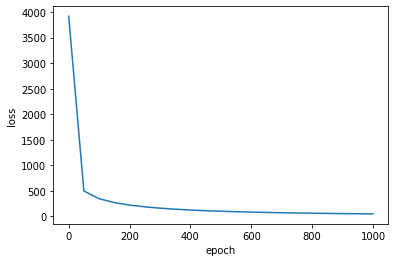

In [12]:
plt.plot(loss_e, loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
f = plt.gcf()
f.savefig('../data/HW5/loss.png')
plt.show()

In [17]:
w_1_array = []
w_1_ep = []
w_2_array = []
w_2_ep = []
w_3_array = []
w_3_ep = []
for index, wl in enumerate(w_list):
    ep = index * 100
    cur_list = list(wl[0].flatten())
    w_1_array += cur_list
    w_1_ep += [ep] * len(cur_list)
    
    cur_list = list(wl[1].flatten())
    w_2_array += cur_list
    w_2_ep += [ep] * len(cur_list)
    
    cur_list = list(wl[2].flatten())
    w_3_array += cur_list
    w_3_ep += [ep] * len(cur_list)

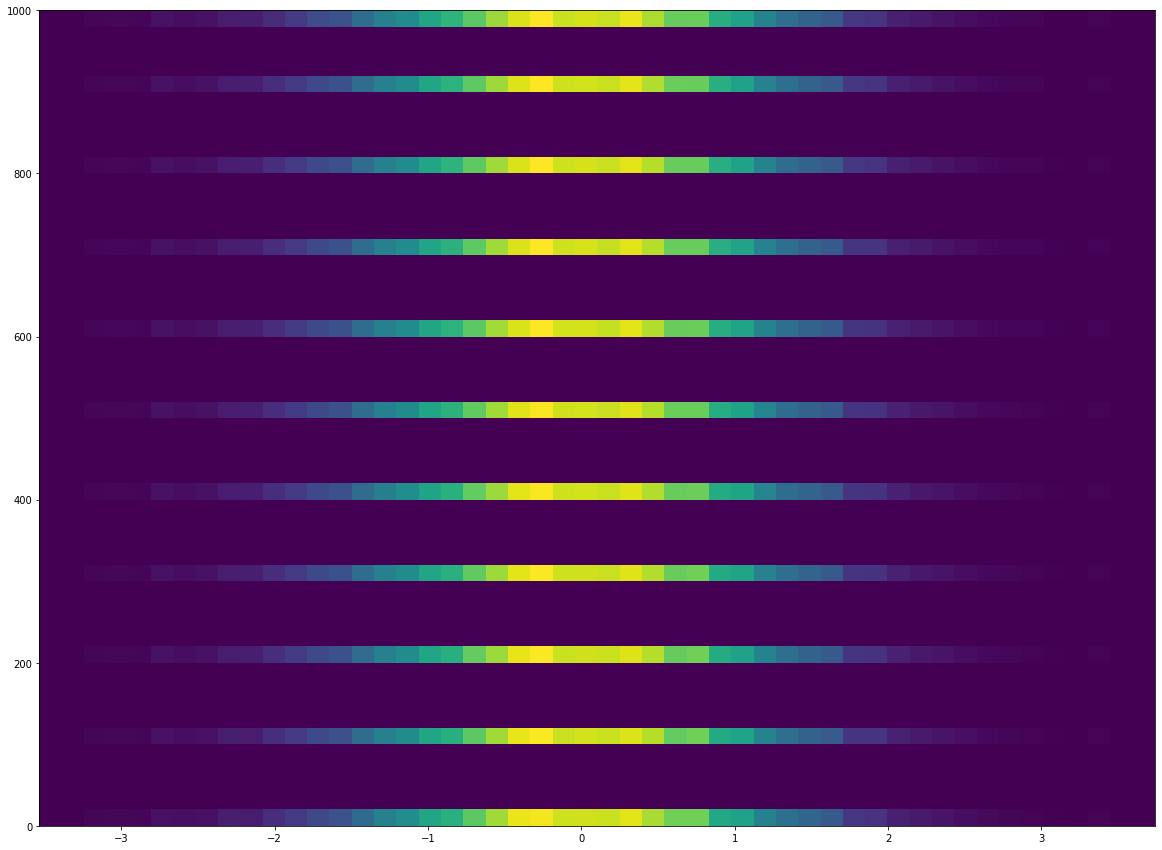

In [34]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 50))
# axes[0].hist2d(w_1_array, w_1_ep, bins=50)
# axes[1].hist2d(w_2_array, w_2_ep, bins=50)
# axes[2].hist2d(w_3_array, w_3_ep, bins=50)
# plt.show()
plt.figure(figsize=(20, 15))
plt.hist2d(w_1_array, w_1_ep, bins=50)
f = plt.gcf()
f.savefig('../data/HW5/w1.png')
plt.show()

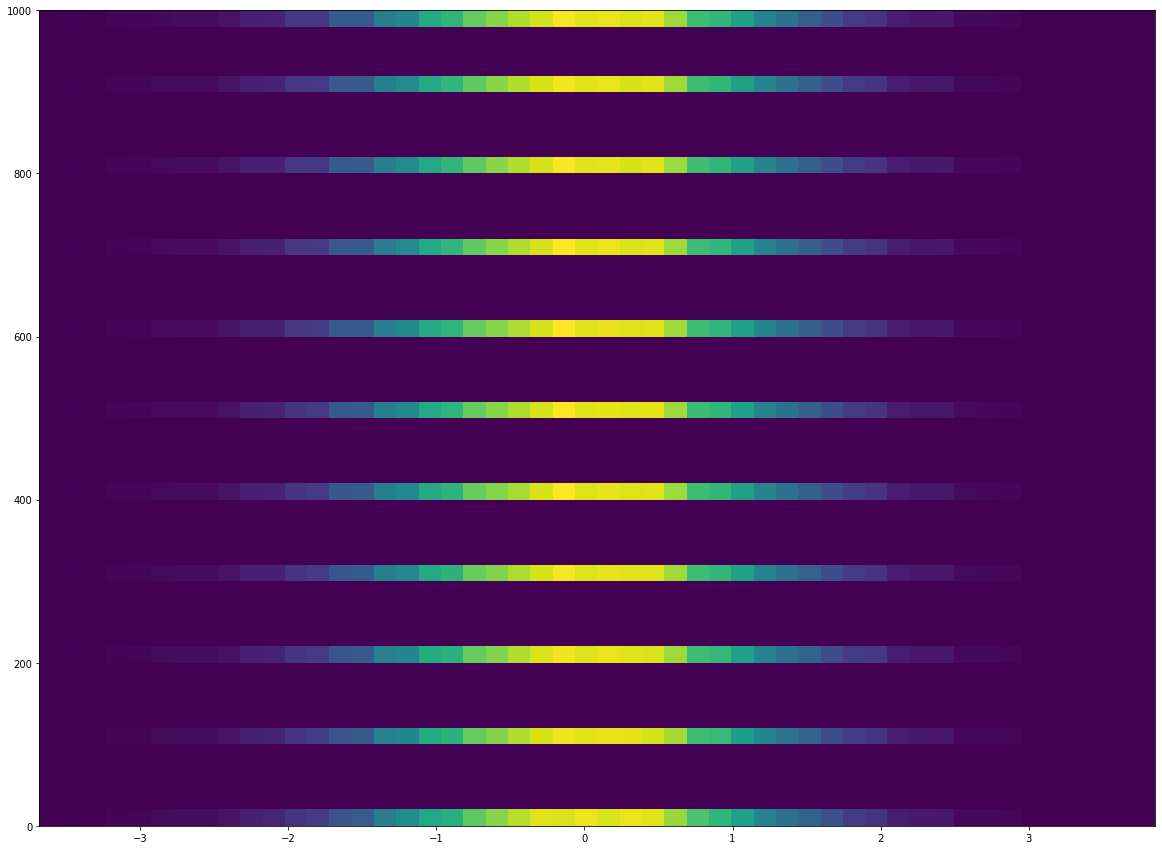

In [35]:
plt.figure(figsize=(20, 15))
plt.hist2d(w_2_array, w_2_ep, bins=50)
f = plt.gcf()
f.savefig('../data/HW5/w2.png')
plt.show()

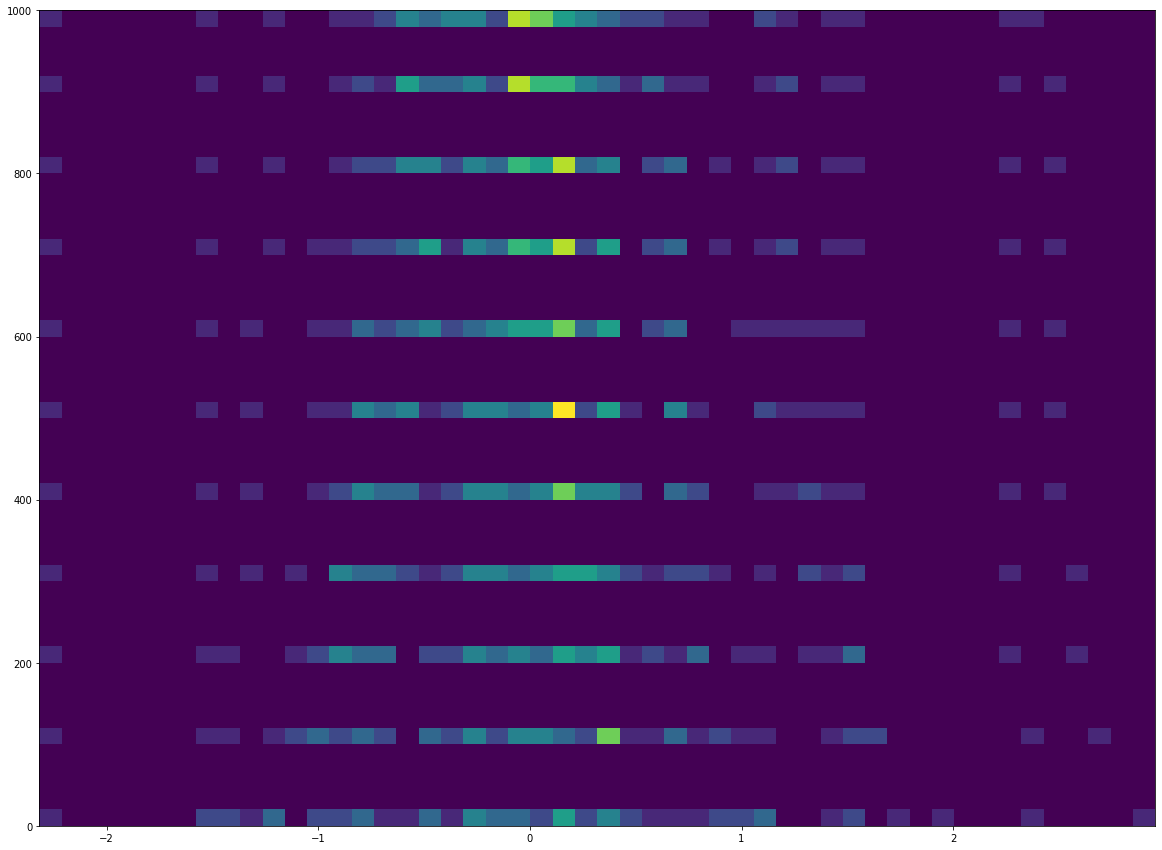

In [36]:
plt.figure(figsize=(20, 15))
plt.hist2d(w_3_array, w_3_ep, bins=50)
f = plt.gcf()
f.savefig('../data/HW5/w3.png')
plt.show()